In [149]:
import pandas as pd
from PIL import Image
import numpy as np
import os
from IPython.display import display
def mostrar_imagen(imagen):
    display(imagen)
def cargar_imagen(ruta_base, nombre_imagen):
    ruta_imagen = os.path.join(ruta_base, nombre_imagen)
    imagen = Image.open(ruta_imagen)
    return imagen
from PIL import Image

from PIL import Image

def get_subimage(image, bbox, size=None):
    """
    Extrae la subimagen de una imagen dada según un cuadro delimitador en formato [x, y, w, h],
    donde las coordenadas están normalizadas (valores entre 0 y 1).
    
    Parámetros:
    - image: Objeto de imagen PIL.
    - bbox: Lista o array con las coordenadas normalizadas [x, y, w, h],
            donde (x, y) es el centro del cuadro y (w, h) son el ancho y alto del cuadro.

    Retorna:
    - subimage: La subimagen recortada.
    """
    # Obtiene el tamaño de la imagen
    width, height = image.size
    
    # Desempaqueta los valores del cuadro delimitador
    x_center, y_center, box_width, box_height = bbox

    # Desnormaliza y convierte [x, y, w, h] a [x1, y1, x2, y2]
    x1 = int((x_center - box_width / 2) * width)
    y1 = int((y_center - box_height / 2) * height)
    x2 = int((x_center + box_width / 2) * width)
    y2 = int((y_center + box_height / 2) * height)

    # Recorta la subimagen usando las coordenadas calculadas
    subimage = image.crop((x1, y1, x2, y2))
    if size is not None:
        subimage = subimage.resize(size)
    return subimage

def recortar_images_cnn(ruta_base,lista_nombres_img,predicciones,directorio_destino,size):
    for i in range(len(lista_nombres_img)):
        imagen = cargar_imagen(ruta_base, lista_nombres_img[i])
        subimagen = get_subimage(imagen, predicciones[i], size)
        subimagen.save(os.path.join(directorio_destino, lista_nombres_img[i]))
        if i % 1000 == 0:
            print(f"Imagen {i} recortada")



In [150]:
predicciones_pulmones = pd.read_csv('../../datasets/covid/recortes_cnn/train_detect_0.7_conf.csv')
predicciones_pulmones_test = pd.read_csv('../../datasets/covid/recortes_cnn/test_detect_0.7_conf.csv')

In [151]:
print(predicciones_pulmones.shape)
print(predicciones_pulmones_test.shape)

(65584, 7)
(8263, 7)


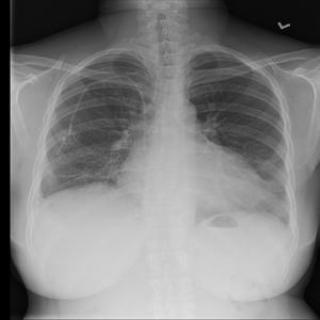

In [152]:
registro = predicciones_pulmones.iloc[0]
imagen = registro['image']
p1 = (registro['x1'], registro['y1'])
p2 = (registro['x2'], registro['y2'])
imagen = cargar_imagen('../../datasets/covid/recortes_cnn/train', imagen)
mostrar_imagen(imagen)

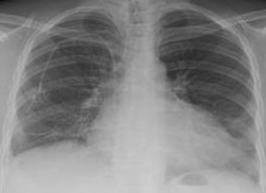

In [153]:
a = get_subimage(imagen,[registro['x1'], registro['y1'], registro['x2'], registro['y2']])
a

In [154]:
recortar_images_cnn(
    '../../datasets/covid/recortes_cnn/train',
    predicciones_pulmones['image'],
    predicciones_pulmones[['x1','y1','x2','y2']].values,
    '../../datasets/covid/recortes_cnn/train_pulmones',
    (224,224)
)
recortar_images_cnn(
    '../../datasets/covid/recortes_cnn/test',
    predicciones_pulmones_test['image'],
    predicciones_pulmones_test[['x1','y1','x2','y2']].values,
    '../../datasets/covid/recortes_cnn/test_pulmones',
    (224,224)
)

Imagen 0 recortada
Imagen 1000 recortada
Imagen 2000 recortada
Imagen 3000 recortada
Imagen 4000 recortada
Imagen 5000 recortada
Imagen 6000 recortada
Imagen 7000 recortada
Imagen 8000 recortada
Imagen 9000 recortada
Imagen 10000 recortada
Imagen 11000 recortada
Imagen 12000 recortada
Imagen 13000 recortada
Imagen 14000 recortada
Imagen 15000 recortada
Imagen 16000 recortada
Imagen 17000 recortada
Imagen 18000 recortada
Imagen 19000 recortada
Imagen 20000 recortada
Imagen 21000 recortada
Imagen 22000 recortada
Imagen 23000 recortada
Imagen 24000 recortada
Imagen 25000 recortada
Imagen 26000 recortada
Imagen 27000 recortada
Imagen 28000 recortada
Imagen 29000 recortada
Imagen 30000 recortada
Imagen 31000 recortada
Imagen 32000 recortada
Imagen 33000 recortada
Imagen 34000 recortada
Imagen 35000 recortada
Imagen 36000 recortada
Imagen 37000 recortada
Imagen 38000 recortada
Imagen 39000 recortada
Imagen 40000 recortada
Imagen 41000 recortada
Imagen 42000 recortada
Imagen 43000 recortada
I